In [9]:
# Raster analysis

import arcpy

# Define the workspace
arcpy.env.workspace = "C:/EsriTraining/ProBasics/NorthridgeData/Database/Northridge.gdb"

print(arcpy.Exists(arcpy.env.workspace))

# Check if the ArcGIS Spatial Analyst Extension is available
print(arcpy.CheckOutExtension("Spatial"))

arcpy.env.overwriteOutput = True

True
CheckedOut


In [10]:
root = "C:/EsriTraining"
rgdb = "outraster.gdb"

raster_gdb = root + "/" + rgdb

if arcpy.Exists(raster_gdb):
    arcpy.Delete_management(raster_gdb)
    print("Deleting", raster_gdb)
    print("Creating", raster_gdb)
    arcpy.CreateFileGDB_management(root, rgdb)
    
else:
    print("Creating", raster_gdb)
    arcpy.CreateFileGDB_management(root, rgdb)

ExecuteError: ERROR 000601: Cannot delete C:/EsriTraining/outraster.gdb.  May be locked by another application.
Failed to execute (Delete).


In [11]:
# Calculate slope using the elevation dataset inside Northridge.gdb

out_slope = arcpy.sa.Slope("Elevation", "DEGREE", 1)

out_slope_name = raster_gdb + "/Slope"
print(out_slope_name)

out_slope.save(out_slope_name)

C:/EsriTraining/outraster.gdb/Slope


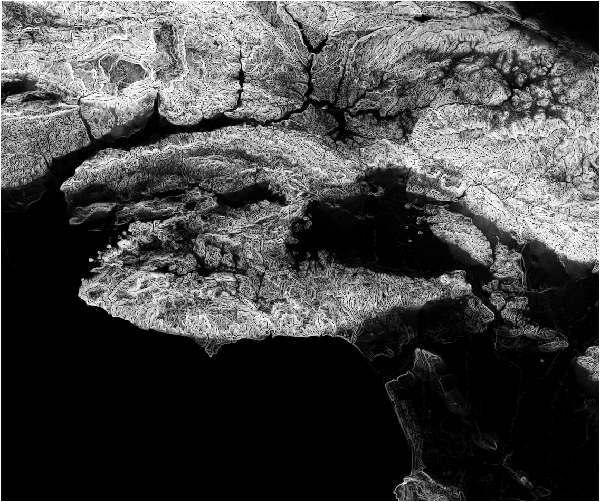

In [12]:
# You can type the name of the layer and execute
# to look at it from Jupyter Notebook

out_slope

In [13]:
# Calculate the aspect surface using the elevation

out_aspect = arcpy.sa.Aspect("Elevation")
out_aspect_name = raster_gdb + "/Aspect"
print(out_aspect_name)
out_aspect.save(out_aspect_name)

C:/EsriTraining/outraster.gdb/Aspect


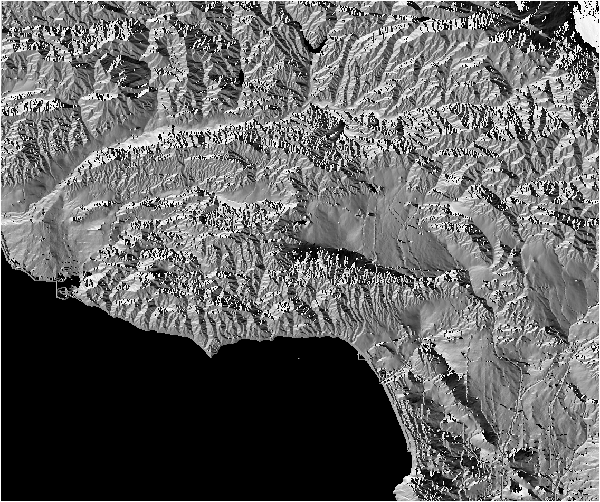

In [14]:
out_aspect

In [15]:
# Conduct some arithmetical operations

arithmetic_raster = out_slope + out_aspect
arithmetic_raster_name = raster_gdb + "/Arithmetic"
arithmetic_raster.save(arithmetic_raster_name)

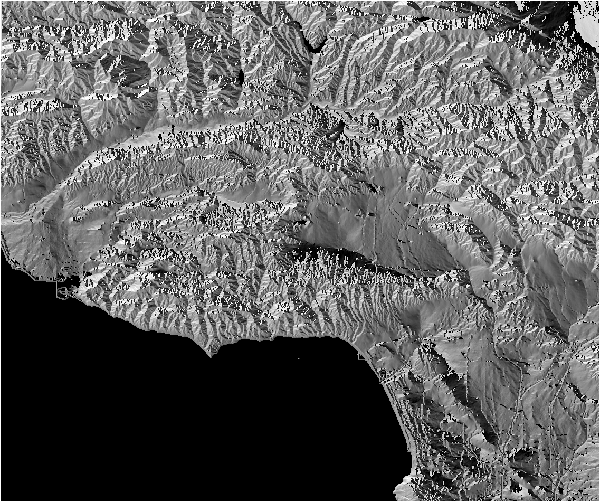

In [16]:
arithmetic_raster

In [17]:
# Conduct some arithmetical operations 2

arithmetic_raster2 = (out_slope * 10)+ out_aspect
arithmetic_raster_name2 = raster_gdb + "/Arithmetic"
arithmetic_raster2.save(arithmetic_raster_name2)

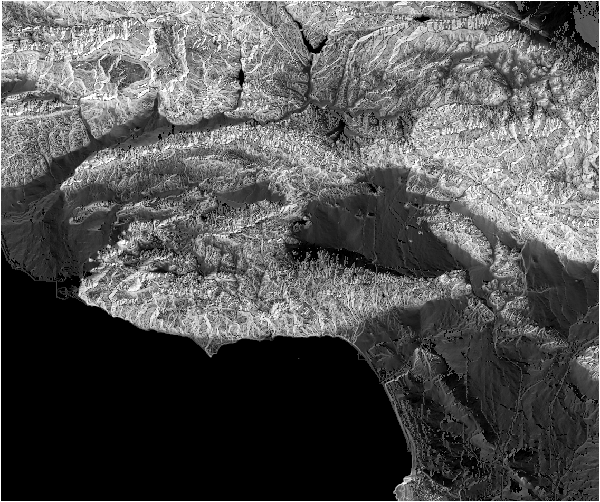

In [18]:
arithmetic_raster2

In [19]:
# How to convert a vector feature class to a raster?
damage_raster_name = raster_gdb + "/Damage"
arcpy.conversion.FeatureToRaster("BlockGroups", "Damaged", damage_raster_name, 100)

<Result 'C:\\EsriTraining\\outraster.gdb\\Damage'>

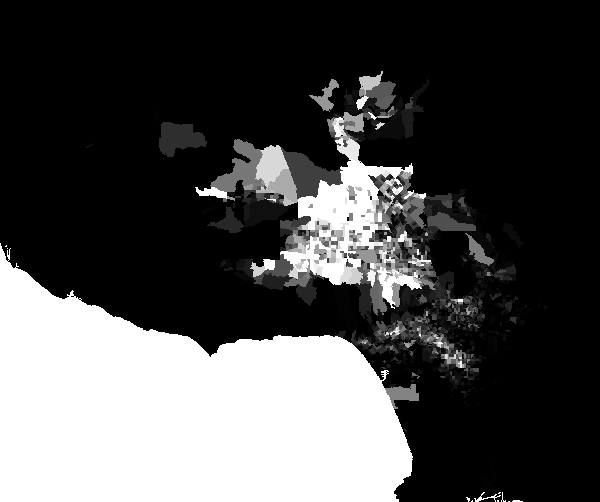

In [20]:
damage_raster = arcpy.Raster(damage_raster_name)
damage_raster

In [21]:
# Create a custom slope raster:
# if slope value is over 20, make the new value 10,
# else, make it 5

out_con = arcpy.sa.Con(out_slope, 10, 5, "VALUE > 20")
out_con_name = raster_gdb + "/con1"
print(out_con_name)
out_con.save(out_con_name)

#arithmetic_raster_name2 = raster_gdb + "/Arithmetic"
#arithmetic_raster2.save(arithmetic_raster_name2)

C:/EsriTraining/outraster.gdb/con1


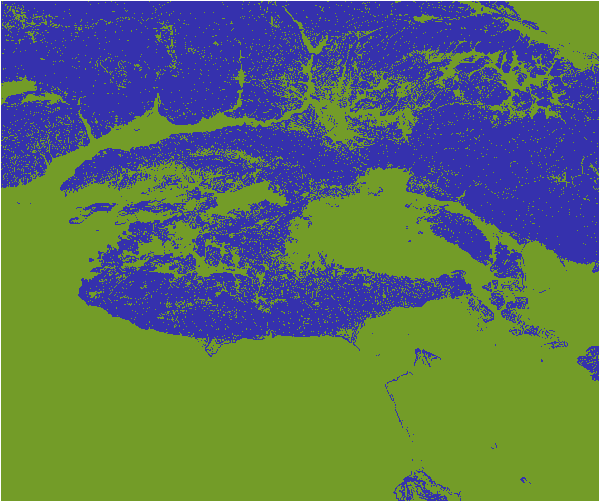

In [22]:
out_con

In [23]:
# Second conditional example with slope
# If value over 10, make the value None / NA
# To keep the same values, repeat the name of the layer
#out_con = arcpy.sa.Con(out_slope, 10, 5, "VALUE > 20")

# The second parameter cannot be a null, it has to a raster or scalar
out_con2 = arcpy.sa.Con(out_slope, out_slope, "", "VALUE < 10")
out_con2_name = raster_gdb + "/con2"
print(out_con2_name)
out_con2.save(out_con2_name)

C:/EsriTraining/outraster.gdb/con2


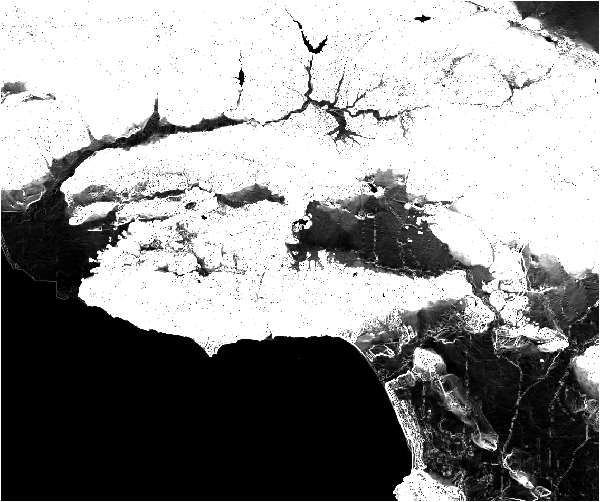

In [24]:
out_con2

In [25]:
# If we use a raster with null values, the resulting
# rasters will have null values at the same locations

arithmetic_raster3 = (out_con2 * 10) + out_aspect
arithmetic_raster3_name = raster_gdb + "/arithmetic3"
arithmetic_raster3.save(arithmetic_raster3_name)

In [26]:
# Create a custom slope. If value over 30 or value under 10, 
# keep the original value (the value from the input layer). If not, assign zero
# Hint: you can use AND/OR operators within the conditional statement

out_con3 = arcpy.sa.Con(out_slope, out_slope, 0, "VALUE > 30 or VALUE < 10")
out_con3_name = raster_gdb + "/con3"
print(out_con3_name)
out_con3.save(out_con3_name)

C:/EsriTraining/outraster.gdb/con3


In [27]:
# how to reclassify values e.g.:
# <10 -> 1
# 10-20 -> 2
# 20-30 -> 3
# >30 -> 4

out_classify = arcpy.sa.Reclassify(out_slope, "Value", 
                                   arcpy.sa.RemapRange([[0,10,1], [10,20,2], [20,30,3], [30,90, 4]]))
out_classify.save(raster_gdb + "/classify")

In [28]:
# normalization

print(out_slope.minimum, out_slope.maximum)

0.0 87.5093002319336


In [29]:
# Normalize the slope and damage layers between 0 and 100 

slope_norm = (out_slope - out_slope.minimum) / (out_slope.maximum - out_slope.minimum) * 100
slope_norm.save(raster_gdb + "/slope_normalized")

damage_norm = (damage_raster - damage_raster.minimum) / (damage_raster.maximum - damage_raster.minimum) * 100
damage_norm.save(raster_gdb + "/damage_normalized")

In [30]:
# Normalize the slope so that all the values between 20 and max 
# are scaled between 0 and 100. Any value that is originally smaller 
# than 20 should be zero

slope_norm2 = (out_slope - 20) / (out_slope.maximum - 20) * 100
slope_norm2.save(raster_gdb + "/slope_normalized2")

slope_norm3 = arcpy.sa.Con(slope_norm2, 0, slope_norm2, "VALUE<0")
slope_norm3.save(raster_gdb + "/slope_normalized3")

In [31]:
# Normalize the slope layer so that values between 25 and 50 are 
# scaled/normalized between 0 and 100.
# Any original value < 25 -> 0
# Any original value > 50 -> 100

slope_norm4 = (out_slope - 25) / (50 - 25) * 100
slope_norm4.save(raster_gdb + "/slope_normalized4")

# anything lower than 0 -> 0
# anything larger than 100 -> 100

slope_norm5 = arcpy.sa.Con(slope_norm4, 0, slope_norm4, "VALUE < 0")
slope_norm6 = arcpy.sa.Con(slope_norm5, 100, slope_norm5, "VALUE > 100")

slope_norm6.save(raster_gdb + "/slope_normalized6")

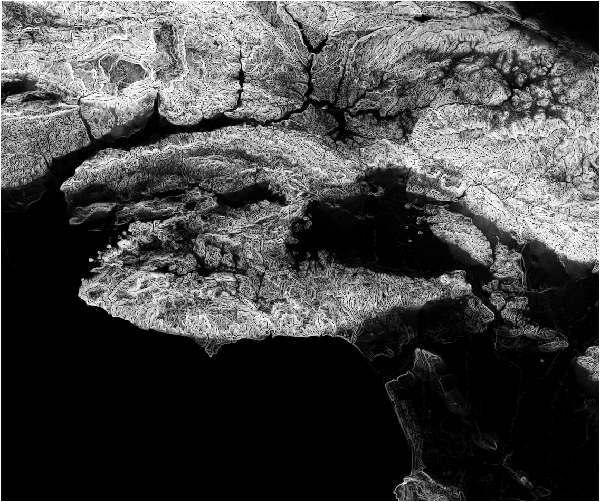

In [36]:
out_slope

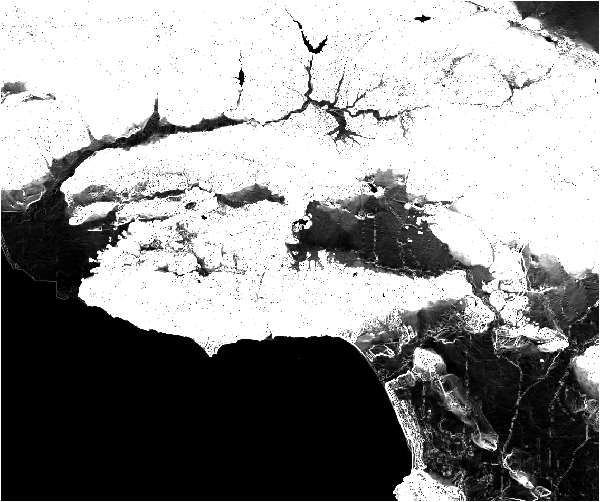

In [40]:
slope_romane2

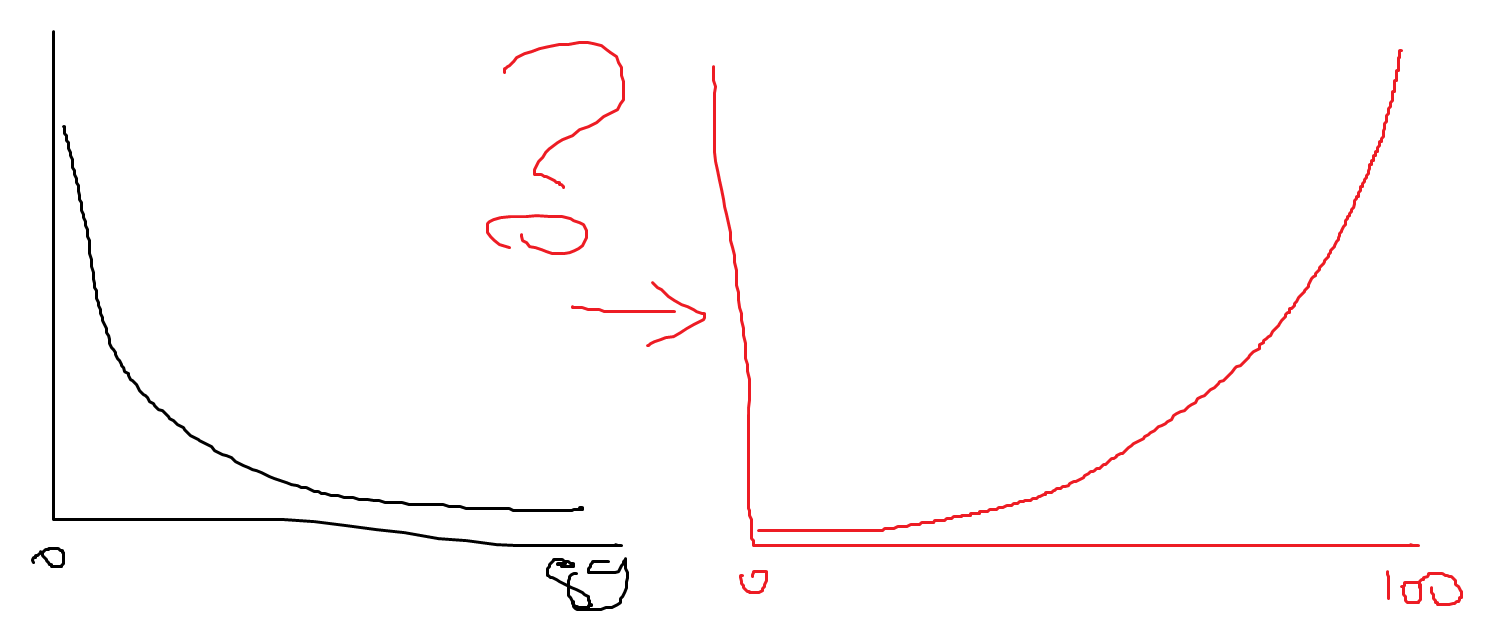

In [48]:
# Take the slope map and invert it so that the 
# 0 pixel value becomes 100, and maximum value (~90) becomes 0

slope_inv = (out_slope - out_slope.maximum) * -1
slope_inv = slope_inv / slope_inv.maximum * 100
slope_inv.save(raster_gdb + "/slope_inv")

In [49]:
# Romane's question
# Normalize the slope layer so that 0 is 0, 10 is 100
# Any value over 100 should be null

slope_romane = arcpy.sa.Con(out_slope, out_slope, "", "VALUE < 10")
slope_romane2 = (slope_romane - slope_romane.minimum) / (slope_romane.maximum - slope_romane.minimum) * 100

slope_romane2.save(raster_gdb + "/slope_romane")

# Second step: make zero slope have the score 100, 
# and have 10 degrees have the score 0

slope_romane3 = (slope_romane2 - slope_romane2.maximum) *  -1
slope_romane3.save(raster_gdb + "/slope_romane_inv")

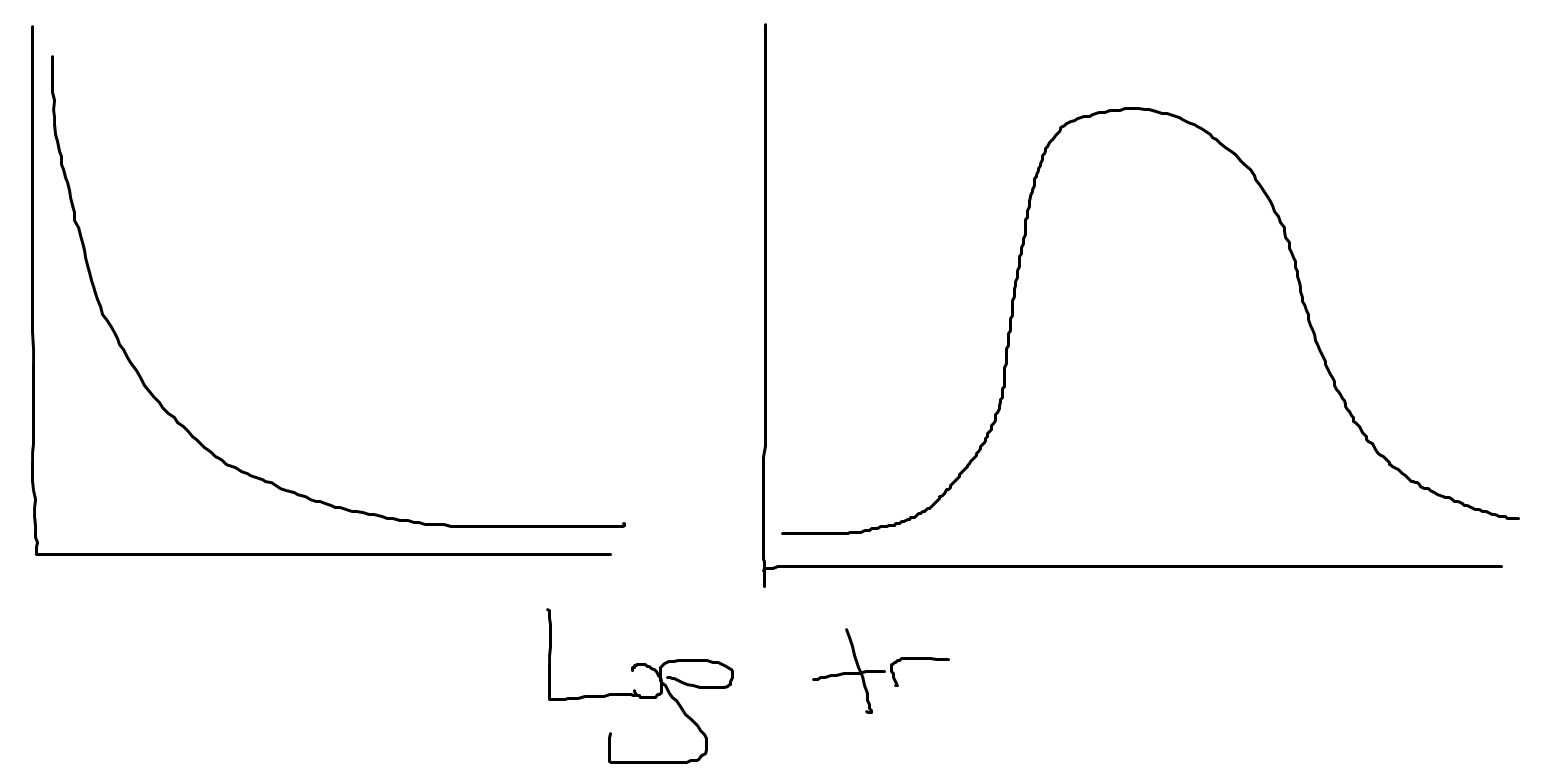

In [50]:
# How to conduct a logarithmic transformation?
# https://desktop.arcgis.com/en/arcmap/10.3/tools/spatial-analyst-toolbox/log10.htm#C_GUID-216F0B4A-9296-45C4-B96A-E1CE621BF4F5

slope_log10 = arcpy.sa.Log10(out_slope)
slope_log10.save(raster_gdb + "/slope_log10")

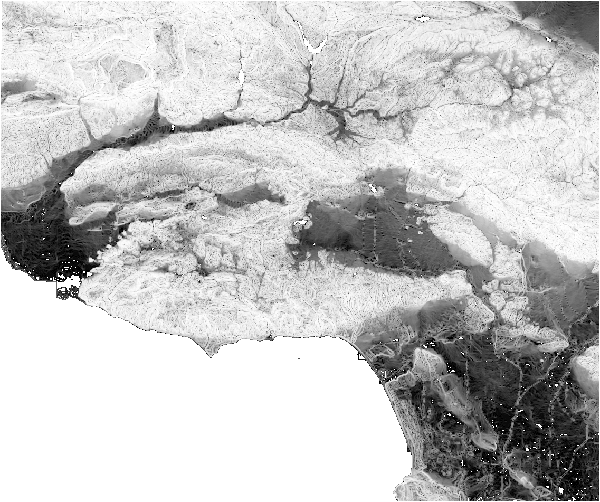

In [51]:
slope_log10

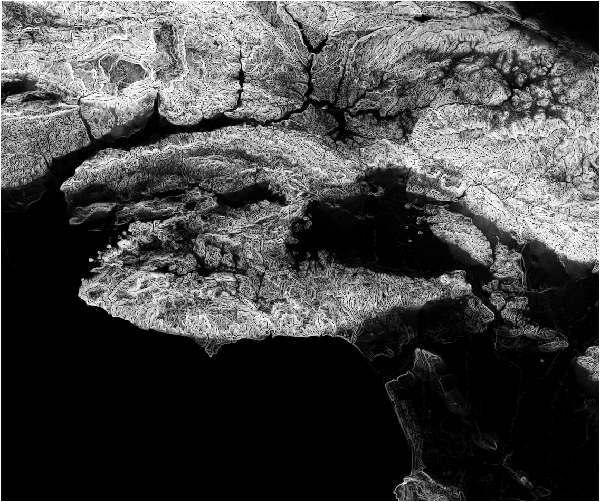

In [63]:
out_slope

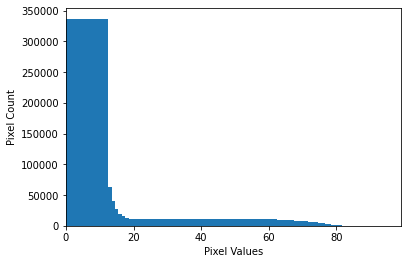

In [65]:
# how to create histograms within Jupyter notebooks
# without opening ArcGIS pro?
# https://gis.stackexchange.com/questions/303865/accessing-raster-values-to-create-histogram-using-arcpy

import numpy
import matplotlib.pyplot

# Convert an ArcGIS raster to a numpy array to calculate a histogram
slope_array = arcpy.RasterToNumPyArray(out_slope)
hist, bins = numpy.histogram(slope_array, bins = range(0,100))

# Plot the histogram
matplotlib.pyplot.bar(bins[:-1], hist, width = 25)
matplotlib.pyplot.xlim(min(bins), max(bins))
matplotlib.pyplot.ylabel('Pixel Count')
matplotlib.pyplot.xlabel('Pixel Values')
matplotlib.pyplot.show() 


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


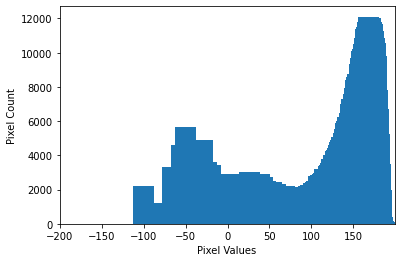

In [67]:
# Convert an ArcGIS raster to a numpy array to calculate a histogram
slope_array_log = arcpy.RasterToNumPyArray(slope_log10)
hist, bins = numpy.histogram(slope_array_log*100, bins = range(-200,200))

# Plot the histogram
matplotlib.pyplot.bar(bins[:-1], hist, width = 25)
matplotlib.pyplot.xlim(min(bins), max(bins))
matplotlib.pyplot.ylabel('Pixel Count')
matplotlib.pyplot.xlabel('Pixel Values')
matplotlib.pyplot.show() 

In [68]:
slope_ln = arcpy.sa.Ln(out_slope)
slope_ln.save(raster_gdb + "/slope_ln")

In [72]:
# Let's grab some information from rasters
# Create a mini report on a raster

print("Minimum value:\t\t", out_slope.minimum, "\nMaximum value:\t\t", out_slope.maximum, 
     "\nWidth (pixels):\t\t", out_slope.width, "\nHeight (pixels):\t", out_slope.height,
     "\nCell width:\t\t", out_slope.meanCellWidth, out_slope.spatialReference.linearUnitName)

Minimum value:		 0.0 
Maximum value:		 87.5093002319336 
Width (pixels):		 1137 
Height (pixels):	 951 
Cell width:		 100.0 Meter


In [73]:
# How to get additional raster properties?
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/get-raster-properties.htm

print("X min:", arcpy.GetRasterProperties_management(out_slope, "LEFT"))

X min: 293237.12498628


In [76]:
# Convert slope raster to a numpy array

slope_array = arcpy.RasterToNumPyArray(out_slope, nodata_to_value = 0)

In [77]:
# print the values of the slope as an array in python environment

print(slope_array)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.         86.479774   ...  1.2194558   1.3203686
   0.        ]
 [ 0.          0.         87.20103    ...  1.3773675   1.4604452
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.60769075  0.5454231
   0.        ]
 [ 0.          0.          0.         ...  0.59057045  0.6485165
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


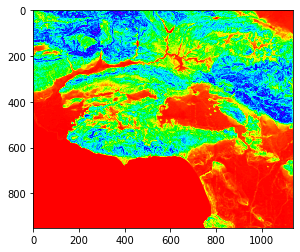

In [83]:
# Use the matplotlib library to view the raster image
import matplotlib.pyplot
# You can use a bunch of color schemes
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
imgplot = matplotlib.pyplot.imshow(slope_array, cmap='hsv')
matplotlib.pyplot.show()

In [84]:
print(slope_array.shape)

(951, 1137)


In [85]:
print(slope_array.size)

1081287


In [86]:
print(slope_array.dtype)

float32


In [87]:
print(slope_array[300, 200])

58.42951


In [88]:
column200 = slope_array[:, 200]
print(column200)

[ 0.         60.096764   60.251404   58.895947   46.55116    34.128414
 49.412785   60.626633   63.014687   66.18633    67.26987    67.67476
 66.8019     66.03584    66.49314    60.95009    47.761803   59.755024
 64.53055    64.16459    65.89213    63.95874    59.250393   67.64773
 67.17132    66.38674    63.019154   52.22639    56.69264    64.97576
 61.217      57.2287     59.349552   48.81716    40.030758   52.273777
 52.709747   41.34927    31.567945   21.016962    3.6188834  38.4947
 56.73866    44.78647    36.40516    20.990543   18.591078   32.942043
 31.092821   25.163692   55.50459    65.52141    59.194042   52.548836
 44.834366   43.072586   50.83686    50.93524    49.943527   56.487732
 50.505512   50.719296   64.23724    59.90783    60.081974   59.0072
 60.294693   62.07606    61.329227   63.907013   63.084694   59.354076
 56.873814   51.04249    56.6895     58.2599     58.89377    68.63388
 74.751465   74.69384    55.50903    41.19253    56.000927   60.699234
 62.510994   6

In [89]:
slice_slope = slope_array[300:305, 400:404]
print(slice_slope)

[[27.726187 29.182121 31.735376 28.482126]
 [36.85071  27.879883 26.584806 23.198854]
 [38.030617 27.153807 18.880106 20.796907]
 [40.187733 34.444733 24.006687 30.489426]
 [46.194786 46.221092 45.987423 49.56298 ]]


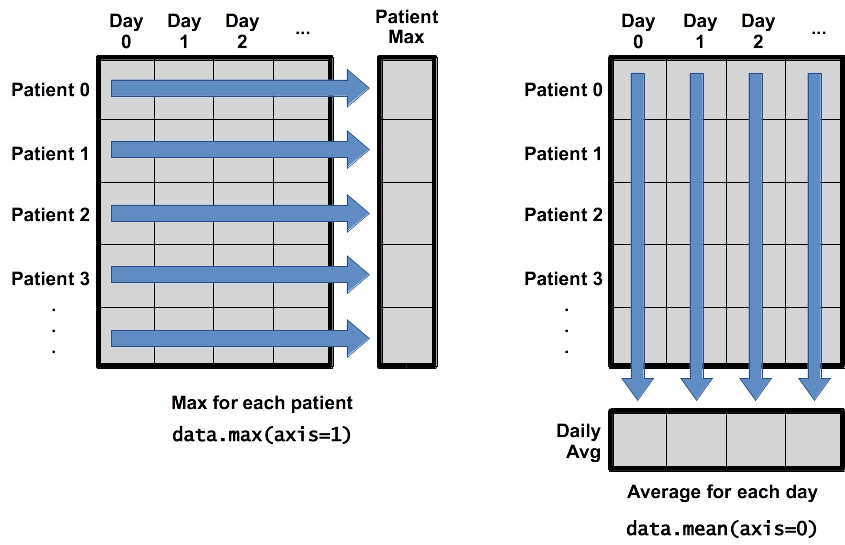

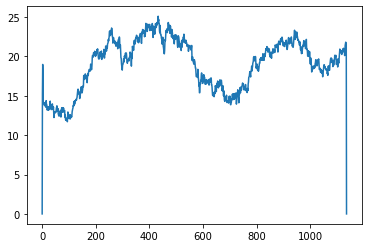

In [90]:
# Let's calculate the average pixel value of each column,
# and create a chart based on that
ave_slope = numpy.mean(slope_array, axis = 0)
ave_plot = matplotlib.pyplot.plot(ave_slope)
matplotlib.pyplot.show()

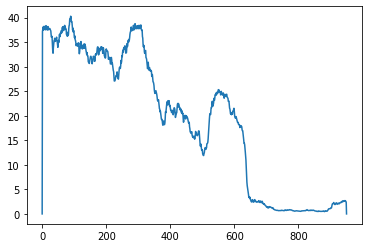

In [91]:
# Calculate the average pixel value for each row
# and create a chart based on that

ave_slope2 = numpy.mean(slope_array, axis = 1)
ave_plot2 = matplotlib.pyplot.plot(ave_slope2)
matplotlib.pyplot.show()

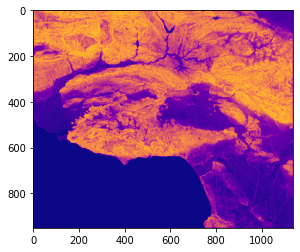

In [92]:
# Let's use numpy for some arithmetic operations
# on the raster array we got from ArcGIS

slope_sqrt = numpy.sqrt(slope_array)
imgplot = matplotlib.pyplot.imshow(slope_sqrt, cmap = 'plasma')
matplotlib.pyplot.show()

In [95]:

# From ArcGIS to numpy
# slope_array = arcpy.RasterToNumPyArray(out_slope, nodata_to_value = 0)

# Export a numpy array back into ArcGIS Pro
# From numpy to ArcGIS
# NumPyArrayToRaster (in_array, {lower_left_corner}, {x_cell_size}, {y_cell_size}, {value_to_nodata}, {mdinfo})

x_min = float(arcpy.GetRasterProperties_management(out_slope, "LEFT").getOutput(0))
y_min = float(arcpy.GetRasterProperties_management(out_slope, "BOTTOM").getOutput(0))

numpy_raster = arcpy.NumPyArrayToRaster(slope_sqrt, arcpy.Point(x_min, y_min), x_cell_size = out_slope.meanCellWidth)
numpy_raster.save(raster_gdb + "/numpy_raster")